In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("walmart_weekly_sales_data-230301-055303.csv",parse_dates=["Date"])
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
# Descriptive Statistics of Data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [4]:
# View Information About Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Observation
- There exist No Null Values in the dataset

### Visualize the data distribution of Some Columns

<Axes: >

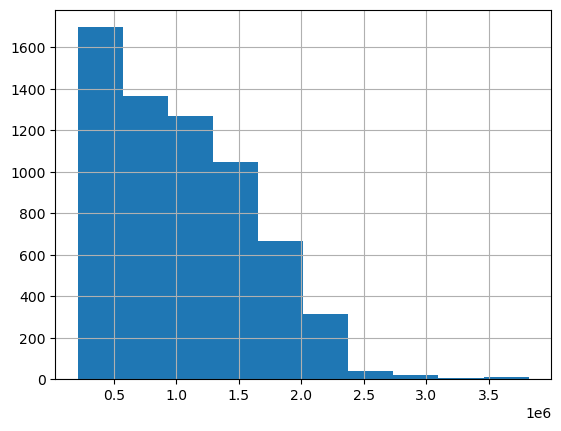

In [5]:
data["Weekly_Sales"].hist()

- The Weekly Sales does not follow normal distribution

## Check for Outliers in the dataset

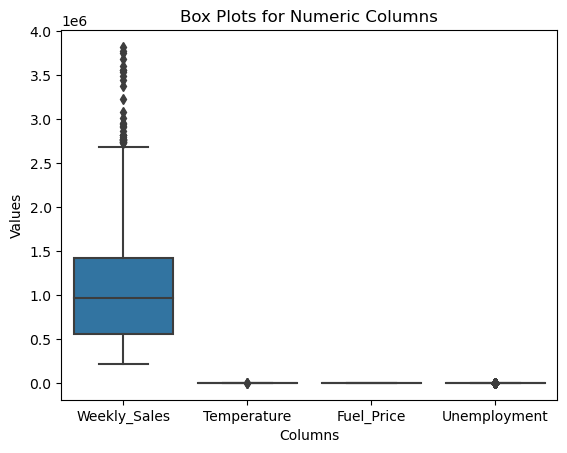

In [7]:
# Plot Box plots on Columns
columns_to_plot = ['Weekly_Sales','Temperature','Fuel_Price','Unemployment']
sns.boxplot(data=data[columns_to_plot])
# Set labels and title
plt.title("Box Plots for Numeric Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Display the plot
plt.show()

# Question 1
## Store With Highest Sales Per Week

In [8]:
highest_sales_store = data['Weekly_Sales'].idxmax()
data.iloc[highest_sales_store]

Store                            14
Date            2010-12-24 00:00:00
Weekly_Sales             3818686.45
Holiday_Flag                      0
Temperature                   30.59
Fuel_Price                    3.141
CPI                       182.54459
Unemployment                  8.724
Name: 1905, dtype: object

- The store with the Highest Weekly Sales is Store 14 with a Sales of 3818686.45
- From the summary data, the store wasn't a Holiday week
- The Week was in the month of December with a date of 2010-12-24

# Question 2
## New Sales Increase

In [9]:
# Add 7% increament to the weekly sales and assigns it a new column
data['New_Weekly_Sales'] = data['Weekly_Sales'] * 0.07 + data['Weekly_Sales']
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Weekly_Sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1.758749e+06
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1.756894e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.724806e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.508409e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.663643e+06


- The New_Weekly_Sales Column represents the 7% increament in Weekly Sales

# Question 3
## Profit Per Store

In [10]:
# Profit Column creation
weekly_sales = data['Weekly_Sales']
labour_cost = 0.26* data['Weekly_Sales']
product_cost = 0.30 * data['Weekly_Sales']
maintenance_cost = 0.125 * data['Weekly_Sales']
data['Profit'] = weekly_sales - (labour_cost+product_cost+maintenance_cost)


In [11]:
# new DataFrame with Profit Column
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Weekly_Sales,Profit
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1.758749e+06,517762.63350
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1.756894e+06,517216.59360
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.724806e+06,507769.97355
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.508409e+06,444064.19085
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.663643e+06,489764.10420


## Question 3
### Temperature Conversion


In [12]:
# Convert Temperature From Fahrenheit to Degree Celcius 
data["Temperature(Celcius)"] = (data["Temperature"] - 32)*0.5556  

In [13]:
# Preview first 5 rows
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Weekly_Sales,Profit,Temperature(Celcius)
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1.758749e+06,517762.63350,5.728236
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1.756894e+06,517216.59360,3.616956
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.724806e+06,507769.97355,4.405908
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.508409e+06,444064.19085,8.128428
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.663643e+06,489764.10420,8.056200


### Store With Coldest Temperature

In [14]:
lowest_temp_store = data['Temperature'].idxmin()
data.iloc[lowest_temp_store]

Store                                     7
Date                    2011-02-04 00:00:00
Weekly_Sales                      558027.77
Holiday_Flag                              0
Temperature                           -2.06
Fuel_Price                            3.011
CPI                              191.762589
Unemployment                          8.818
New_Weekly_Sales                597089.7139
Profit                         175778.74755
Temperature(Celcius)             -18.923736
Name: 910, dtype: object

- From the Summary data above
- Store 7 has the lowest temperature
- The temperature is -2.06F and -18.923736C 

### Store With Highest Temperature


In [15]:
highest_temp_store = data['Temperature'].idxmax()
data.iloc[highest_temp_store]

Store                                    33
Date                    2010-07-16 00:00:00
Weekly_Sales                      280937.84
Holiday_Flag                              0
Temperature                          100.14
Fuel_Price                            2.971
CPI                              126.149806
Unemployment                          9.495
New_Weekly_Sales                300603.4888
Profit                           88495.4196
Temperature(Celcius)              37.858584
Name: 4599, dtype: object

- From the Summary data above
- Store 33 has the highest temperature
- The temperature is 100.14F and 37.858584C 

## Question 4
### Effect of Temperature On Weekly Sales Per Store

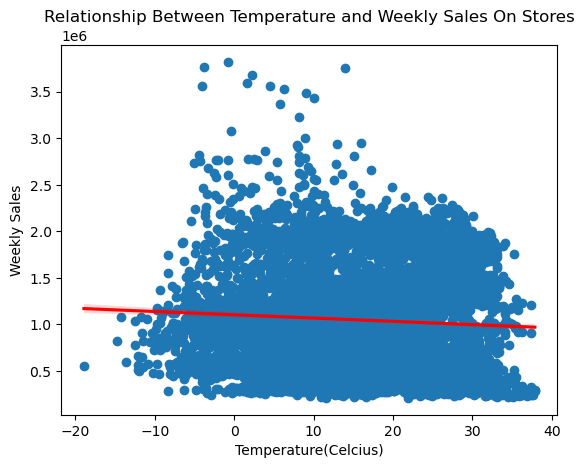

In [16]:
plt.scatter(x= data["Temperature(Celcius)"],y=data["Weekly_Sales"])
sns.regplot(x=data["Temperature(Celcius)"], y=data["Weekly_Sales"], scatter=False, color="red")
plt.title("Relationship Between Temperature and Weekly Sales On Stores")
plt.xlabel("Temperature(Celcius)")
plt.ylabel("Weekly Sales")
# Show the plot
plt.show()

- There exist a negative linear relationship between Temperature and Weekly Sales
- Stores With Lower Temperatures Tend To have Higher Weekly Sales

## Question 5
### Store With the Highest Weekly Sales in 2012

In [17]:
sales_2012 = data[data["Date"].dt.year == 2012]
highest_sales_index = sales_2012["Weekly_Sales"].idxmax()
store_with_highest_sales = data.loc[highest_sales_index]
print("The Store with highest sales in 2012 is:")
print(store_with_highest_sales)

The Store with highest sales in 2012 is:
Store                                    20
Date                    2012-04-06 00:00:00
Weekly_Sales                     2565259.92
Holiday_Flag                              0
Temperature                           50.06
Fuel_Price                            3.996
CPI                              214.238705
Unemployment                          7.139
New_Weekly_Sales               2744828.1144
Profit                          808056.8748
Temperature(Celcius)              10.034136
Name: 2830, dtype: object


- Store 20 has the highest Weekly Sales in 2012 with a Sales of $2565259.92

## Question 6
### Effect Of Fuel Prices on Weekly Sales

In [18]:
# Filter stores with fuel prices greater than $3.50 dollars and  weekly sales greater than $1,000,000
higher_fuel_and_sales = data[(data["Fuel_Price"] > 3.50) & (data["Weekly_Sales"] > 1000000)]
higher_fuel_and_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_Weekly_Sales,Profit,Temperature(Celcius)
60,1,2011-04-01,1495064.75,0,59.17,3.524,214.837166,7.682,1.599719e+06,470945.39625,15.095652
61,1,2011-04-08,1614259.35,0,67.84,3.622,215.074394,7.682,1.727258e+06,508491.69525,19.912704
62,1,2011-04-15,1559889.00,0,71.27,3.743,215.291856,7.682,1.669081e+06,491365.03500,21.818412
63,1,2011-04-22,1564819.81,0,72.99,3.807,215.459905,7.682,1.674357e+06,492918.24015,22.774044
64,1,2011-04-29,1455090.69,0,72.03,3.810,215.627954,7.682,1.556947e+06,458353.56735,22.240668
...,...,...,...,...,...,...,...,...,...,...,...
5858,41,2012-09-28,1307928.01,0,56.08,3.789,198.590328,6.432,1.399483e+06,411997.32315,13.378848
5859,41,2012-10-05,1400160.95,0,50.14,3.779,198.822132,6.195,1.498172e+06,441050.69925,10.078584
5860,41,2012-10-12,1409544.97,0,39.38,3.760,199.053937,6.195,1.508213e+06,444006.66555,4.100328
5861,41,2012-10-19,1326197.24,0,49.56,3.750,199.148196,6.195,1.419031e+06,417752.13060,9.756336


- There exist 1411 number of stores with Weekly Sales of over one million dollars 

## Question 7
### Sales Made in Christmas Week Per Store in 2012

In [19]:
# Pivot Table to display First Five Weekly Sales Made By Stores in Christmas Week
Christmas_sales_2012 = data[data["Date"] == "2012-10-26"]
pivot_table_result = pd.pivot_table(Christmas_sales_2012,values="Weekly_Sales", index="Store",aggfunc="sum")
pivot_table_result.head()

,Weekly_Sales
Store,
1,1493659.74
2,1834458.35
3,405432.70
4,2149594.46
5,319550.77


## Question 8
### How many weeks Had Holidays in 2011

In [20]:
hoildays_2011 = data[(data["Date"].dt.year == 2011) & (data["Holiday_Flag"]==1)]
# Extract unique weeks from the 'Date' column
unique_weeks = hoildays_2011['Date'].dt.strftime('%m-%d').unique()
print(f"There were {len(unique_weeks)} weeks in which holidays occured in 2011")

There were 4 weeks in which holidays occured in 2011


- The 2011 Holiday weeks were '02-11', '09-09', '11-25', '12-30'

## Question 9 
### Highest Unemployment Rate Week in 2012

In [21]:
year_2012 = data[data["Date"].dt.year == 2012]
highest_unemployment = year_2012["Unemployment"].idxmax()
data.loc[highest_unemployment]

Store                                    12
Date                    2012-01-06 00:00:00
Weekly_Sales                      945823.65
Holiday_Flag                              0
Temperature                           50.43
Fuel_Price                            3.599
CPI                              130.157516
Unemployment                         12.187
New_Weekly_Sales               1012031.3055
Profit                         297934.44975
Temperature(Celcius)              10.239708
Name: 1673, dtype: object

## Question 10
### Most Profitable Year in Walmart

In [22]:
year = data["Date"].dt.year
profit_by_year = data.groupby(year)["Profit"].sum().sort_values(ascending=False).head()
profit_df = profit_by_year.reset_index()
profit_df

,Date,Profit
0,2011,7.711830e+08
1,2010,7.209991e+08
2,2012,6.300419e+08


## Visualize Profit By Year

Text(0, 0.5, 'Profit($)')

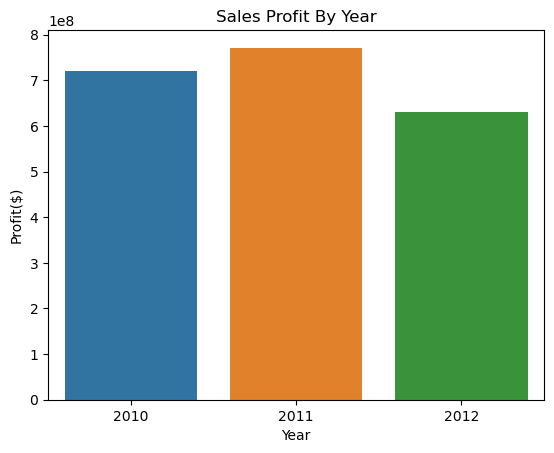

In [23]:

sns.barplot(data = profit_df,x="Date",y="Profit")
plt.title("Sales Profit By Year")
plt.xlabel("Year")
plt.ylabel("Profit($)")